## A breakdown on a few data mining pipeline concepts

- Starting with Data schema: Use of a star schema to look at the fact and dimension tables 
and is attached as both a screenshot and image of the same.

## Part b: 
- Preparing the data for mining, addressing scaling and missing values.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer


In [2]:
data = {
    'CustomerID': [101, 102, 103, 104, 105, 106, 107],
    'Age': [25, 32, 20, 29, 22, 27, 30],
    'Orders': [5, 2, 4, 7, 3, 6, 4],
    'AvgSpend': [380, 120, 260, 490, 200, 350, 420]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print(f"\nDataFrame Shape: {df.shape}")
print(f"Number of records: {df.shape[0]}, Number of features: {df.shape[1]}")

Original DataFrame:
   CustomerID  Age  Orders  AvgSpend
0         101   25       5       380
1         102   32       2       120
2         103   20       4       260
3         104   29       7       490
4         105   22       3       200
5         106   27       6       350
6         107   30       4       420

DataFrame Shape: (7, 4)
Number of records: 7, Number of features: 4


In [6]:
# 2.DATA EXPLORATION AND STATISTICAL SUMMARY
print("\n\n2. DATA EXPLORATION")

print("\nA. Statistical Summary:")
print(df[['Age', 'Orders', 'AvgSpend']].describe().round(2))

print("\nB. Data Types:")
print(df.dtypes)

print("\nC. Check for Missing Values:")
print(df.isnull().sum())



2. DATA EXPLORATION

A. Statistical Summary:
         Age  Orders  AvgSpend
count   7.00    7.00      7.00
mean   26.43    4.43    317.14
std     4.35    1.72    129.96
min    20.00    2.00    120.00
25%    23.50    3.50    230.00
50%    27.00    4.00    350.00
75%    29.50    5.50    400.00
max    32.00    7.00    490.00

B. Data Types:
CustomerID    int64
Age           int64
Orders        int64
AvgSpend      int64
dtype: object

C. Check for Missing Values:
CustomerID    0
Age           0
Orders        0
AvgSpend      0
dtype: int64


In [7]:
# 5.FEATURE SCALING/NORMALIZATION
print("\n\n5. FEATURE SCALING/NORMALIZATION")

features_to_scale = df[['Age', 'Orders', 'AvgSpend']]

print("\nA. Original Data (before scaling):")
print(features_to_scale)

print("\nB. Method 1: Min-Max Scaling (range: 0 to 1)")
print("Formula: X_scaled = (X - X_min) / (X_max - X_min)")
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(features_to_scale)
df_minmax = pd.DataFrame(scaled_minmax, columns=['Age_scaled', 'Orders_scaled', 'AvgSpend_scaled'])
print(df_minmax)

print("\nC. Method 2: Standardization (Z-score)")
print("Formula: X_scaled = (X - μ) / σ")
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(features_to_scale)
df_standard = pd.DataFrame(scaled_standard, columns=['Age_zscore', 'Orders_zscore', 'AvgSpend_zscore'])
print(df_standard)

print("\nD. Method 3: Robust Scaling (uses median and IQR)")
print("Formula: X_scaled = (X - median) / IQR")
scaler_robust = RobustScaler()
scaled_robust = scaler_robust.fit_transform(features_to_scale)
df_robust = pd.DataFrame(scaled_robust, columns=['Age_robust', 'Orders_robust', 'AvgSpend_robust'])
print(df_robust)



5. FEATURE SCALING/NORMALIZATION

A. Original Data (before scaling):
   Age  Orders  AvgSpend
0   25       5       380
1   32       2       120
2   20       4       260
3   29       7       490
4   22       3       200
5   27       6       350
6   30       4       420

B. Method 1: Min-Max Scaling (range: 0 to 1)
Formula: X_scaled = (X - X_min) / (X_max - X_min)
   Age_scaled  Orders_scaled  AvgSpend_scaled
0    0.416667            0.6         0.702703
1    1.000000            0.0         0.000000
2    0.000000            0.4         0.378378
3    0.750000            1.0         1.000000
4    0.166667            0.2         0.216216
5    0.583333            0.8         0.621622
6    0.833333            0.4         0.810811

C. Method 2: Standardization (Z-score)
Formula: X_scaled = (X - μ) / σ
   Age_zscore  Orders_zscore  AvgSpend_zscore
0   -0.354441       0.359211         0.522405
1    1.382318      -1.526645        -1.638451
2   -1.594983      -0.269408        -0.474913
3    0.63



6. VISUALIZING SCALING EFFECTS


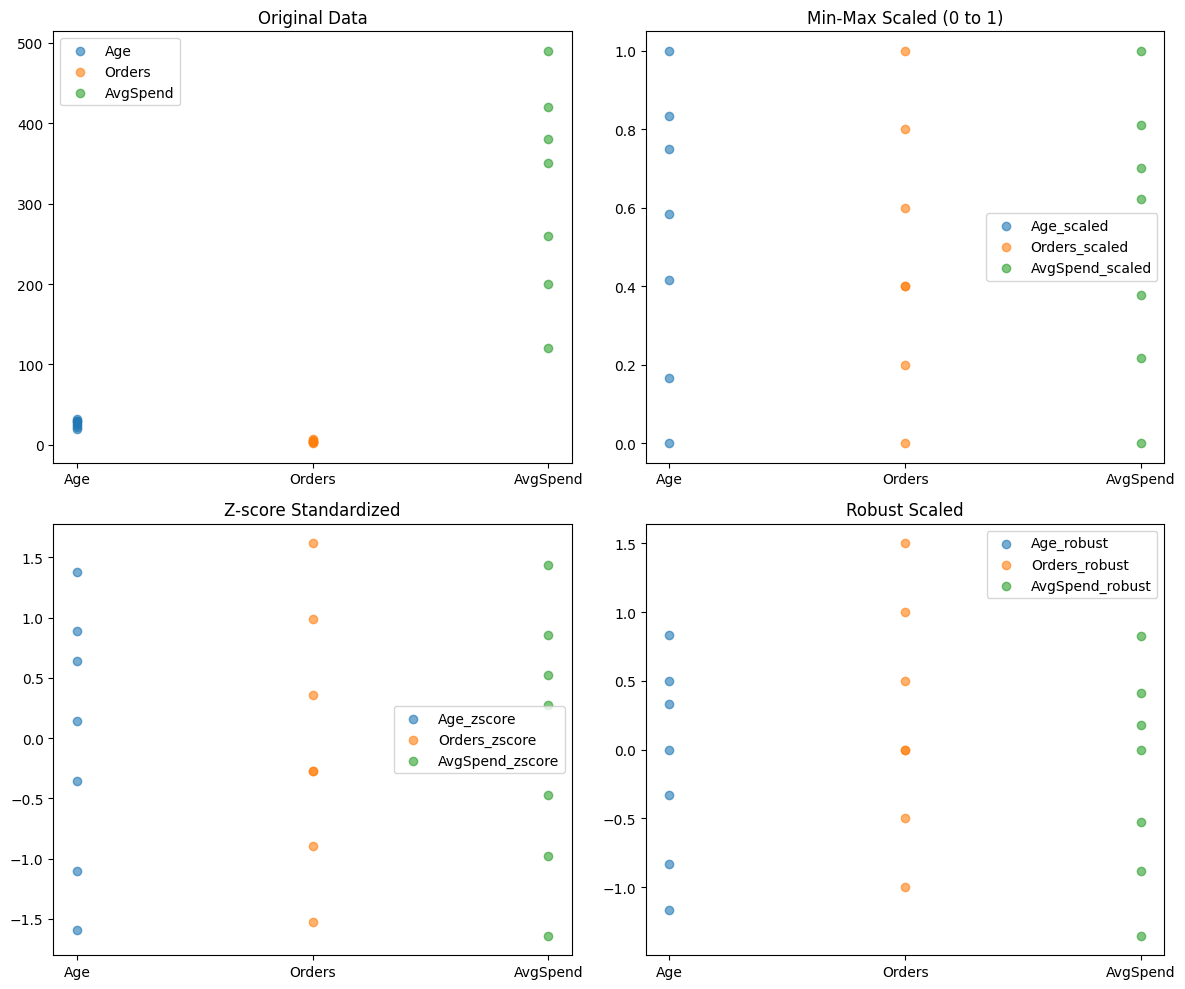

In [8]:
# 6.VISUALIZE SCALING EFFECTS
print("\n\n6. VISUALIZING SCALING EFFECTS")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(['Age', 'Orders', 'AvgSpend']):
    axes[0, 0].scatter([i]*len(df), df[col], alpha=0.6, label=col)
axes[0, 0].set_title('Original Data')
axes[0, 0].set_xticks([0, 1, 2])
axes[0, 0].set_xticklabels(['Age', 'Orders', 'AvgSpend'])
axes[0, 0].legend()

#Min-Max scaled
for i, col in enumerate(['Age_scaled', 'Orders_scaled', 'AvgSpend_scaled']):
    axes[0, 1].scatter([i]*len(df_minmax), df_minmax[col], alpha=0.6, label=col)
axes[0, 1].set_title('Min-Max Scaled (0 to 1)')
axes[0, 1].set_xticks([0, 1, 2])
axes[0, 1].set_xticklabels(['Age', 'Orders', 'AvgSpend'])
axes[0, 1].legend()

#Standardized
for i, col in enumerate(['Age_zscore', 'Orders_zscore', 'AvgSpend_zscore']):
    axes[1, 0].scatter([i]*len(df_standard), df_standard[col], alpha=0.6, label=col)
axes[1, 0].set_title('Z-score Standardized')
axes[1, 0].set_xticks([0, 1, 2])
axes[1, 0].set_xticklabels(['Age', 'Orders', 'AvgSpend'])
axes[1, 0].legend()

#Robust scaled
for i, col in enumerate(['Age_robust', 'Orders_robust', 'AvgSpend_robust']):
    axes[1, 1].scatter([i]*len(df_robust), df_robust[col], alpha=0.6, label=col)
axes[1, 1].set_title('Robust Scaled')
axes[1, 1].set_xticks([0, 1, 2])
axes[1, 1].set_xticklabels(['Age', 'Orders', 'AvgSpend'])
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('scaling_comparison.png', dpi=300, bbox_inches='tight')
plt.show()




7. OUTLIER DETECTION

A. Visual Outlier Detection using Box Plots


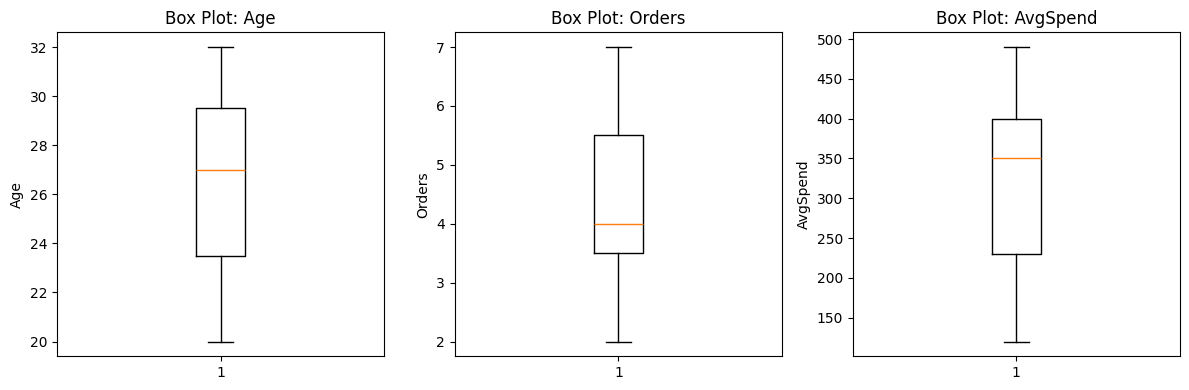


B. Statistical Outlier Detection using IQR Method

Age:
  Q1: 23.50, Q3: 29.50
  IQR: 6.00
  Bounds: [14.50, 38.50]
  Outliers found: 0

Orders:
  Q1: 3.50, Q3: 5.50
  IQR: 2.00
  Bounds: [0.50, 8.50]
  Outliers found: 0

AvgSpend:
  Q1: 230.00, Q3: 400.00
  IQR: 170.00
  Bounds: [-25.00, 655.00]
  Outliers found: 0

C. Outlier Handling Methods
   1. Capping/Winsorizing: Replace outliers with nearest non-outlier value
   2. Transformation: Apply log or square root transformation
   3. Removal: Remove outlier records (if few and justifiable)
   4. Separate treatment: Treat outliers as special category


In [9]:
#7.OUTLIER DETECTION AND HANDLING
print("\n\n7. OUTLIER DETECTION")


print("\nA. Visual Outlier Detection using Box Plots")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, col in enumerate(['Age', 'Orders', 'AvgSpend']):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.savefig('outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nB. Statistical Outlier Detection using IQR Method")
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in ['Age', 'Orders', 'AvgSpend']:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Q1: {df[col].quantile(0.25):.2f}, Q3: {df[col].quantile(0.75):.2f}")
    print(f"  IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers found: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outlier values: {list(outliers[col])}")

print("\nC. Outlier Handling Methods")
print("   1. Capping/Winsorizing: Replace outliers with nearest non-outlier value")
print("   2. Transformation: Apply log or square root transformation")
print("   3. Removal: Remove outlier records (if few and justifiable)")
print("   4. Separate treatment: Treat outliers as special category")

In [10]:
#8. DATA TRANSFORMATION
print("\n\n8. DATA TRANSFORMATION")

print("\nA. Log Transformation (useful for right-skewed data)")
df_log = df.copy()
df_log['Log_AvgSpend'] = np.log1p(df_log['AvgSpend'])  #log(1 + x) to handle zeros
print(df_log[['CustomerID', 'AvgSpend', 'Log_AvgSpend']])

print("\nB. Square Root Transformation")
df_sqrt = df.copy()
df_sqrt['Sqrt_Orders'] = np.sqrt(df_sqrt['Orders'])
print(df_sqrt[['CustomerID', 'Orders', 'Sqrt_Orders']])

print("\nC. Binning/Discretization (to be used in association rules)")
df_binned = df.copy()

# Age bins
df_binned['Age_Group'] = pd.cut(df_binned['Age'], 
                                bins=[0, 25, 30, 35], 
                                labels=['Young', 'Mid', 'Senior'])

# Orders bins
df_binned['Orders_Level'] = pd.cut(df_binned['Orders'], 
                                    bins=[0, 3, 5, 10], 
                                    labels=['Low', 'Medium', 'High'])

# AvgSpend bins
df_binned['Spend_Level'] = pd.cut(df_binned['AvgSpend'], 
                                bins=[0, 300, 400, 500], 
                                labels=['Low', 'Medium', 'High'])

print("Binned Data:")
print(df_binned[['CustomerID', 'Age', 'Age_Group', 'Orders', 'Orders_Level', 
                'AvgSpend', 'Spend_Level']])

print("\nData Preparation Complete!")



8. DATA TRANSFORMATION

A. Log Transformation (useful for right-skewed data)
   CustomerID  AvgSpend  Log_AvgSpend
0         101       380      5.942799
1         102       120      4.795791
2         103       260      5.564520
3         104       490      6.196444
4         105       200      5.303305
5         106       350      5.860786
6         107       420      6.042633

B. Square Root Transformation
   CustomerID  Orders  Sqrt_Orders
0         101       5     2.236068
1         102       2     1.414214
2         103       4     2.000000
3         104       7     2.645751
4         105       3     1.732051
5         106       6     2.449490
6         107       4     2.000000

C. Binning/Discretization (to be used in association rules)
Binned Data:
   CustomerID  Age Age_Group  Orders Orders_Level  AvgSpend Spend_Level
0         101   25     Young       5       Medium       380      Medium
1         102   32    Senior       2          Low       120         Low
2         103   

## Key Explanations for Part (b):
- Missing Value Handling: There was no need for missing value hanfling as there were no missing values.

#### Feature Scaling:
- Min-Max Scaling: Transforms data to [0, 1] range. Good when you know the boundaries.
- Standardization (Z-score): Centers data around 0 with unit variance. Good for algorithms assuming normal distribution.
- Robust Scaling: Uses median and IQR. Resistant to outliers.

#### Outlier Detection:
- IQR Method: Values outside Q1-1.5*IQR and Q3+1.5*IQR are considered outliers, there were no putliers in this.
- Visual Methods: Box plots, scatter plots
- Statistical Methods: Z-score > 3 or < -3

#### Data Transformation:
- Log Transformation: Reduces right skewness, stabilizes variance
- Binning: Converts continuous to categorical for certain algorithms, about to come in handy for the next question in association rule.


## Part c): Compute support, confidence, and lift for a single association rule.

In [11]:
print("PART (c): ASSOCIATION RULE MINING")

#Using the binned data from part (b)
print("\n1. PREPARING TRANSACTIONAL DATA FROM BINNED DATASET")


#Create binary transaction matrix
transactions = []
for idx, row in df_binned.iterrows():
    transaction_items = []
    
    #Age groups
    transaction_items.append(f"Age_{row['Age_Group']}")
    
    #Order levels
    transaction_items.append(f"Orders_{row['Orders_Level']}")
    
    #Spend levels
    transaction_items.append(f"Spend_{row['Spend_Level']}")
    
    transactions.append(transaction_items)

print("\nTransaction List:")
for i, transaction in enumerate(transactions, 1):
    print(f"T{i}: {transaction}")

PART (c): ASSOCIATION RULE MINING

1. PREPARING TRANSACTIONAL DATA FROM BINNED DATASET

Transaction List:
T1: ['Age_Young', 'Orders_Medium', 'Spend_Medium']
T2: ['Age_Senior', 'Orders_Low', 'Spend_Low']
T3: ['Age_Young', 'Orders_Medium', 'Spend_Low']
T4: ['Age_Mid', 'Orders_High', 'Spend_High']
T5: ['Age_Young', 'Orders_Low', 'Spend_Low']
T6: ['Age_Mid', 'Orders_High', 'Spend_Medium']
T7: ['Age_Mid', 'Orders_Medium', 'Spend_High']


In [12]:
# 2.MANUAL CALCULATION OF ASSOCIATION RULES
print("\n\n2. MANUAL CALCULATION OF ASSOCIATION RULES")

#Convert to binary matrix for easier calculations
all_items = sorted(set([item for transaction in transactions for item in transaction]))
binary_matrix = []

for transaction in transactions:
    binary_row = [1 if item in transaction else 0 for item in all_items]
    binary_matrix.append(binary_row)

df_binary = pd.DataFrame(binary_matrix, columns=all_items, 
                        index=[f"T{i}" for i in range(1, len(transactions)+1)])

print("\nBinary Transaction Matrix:")
print(df_binary)

#3. FUNCTION TO CALCULATE ASSOCIATION RULE METRICS
print("\n\n3. ASSOCIATION RULE METRICS CALCULATION FUNCTION")


def calculate_association_metrics(df_binary, antecedent, consequent):
    """
    Calculate support, confidence, and lift for a rule.
    
    Parameters:
    df_binary: DataFrame with binary transaction data
    antecedent: list of items in LHS (antecedent)
    consequent: list of items in RHS (consequent)
    """
    N = len(df_binary)
    
    #Support of antecedent
    antecedent_present = df_binary[antecedent].all(axis=1)
    support_A = antecedent_present.sum() / N
    
    #Support of consequent
    consequent_present = df_binary[consequent].all(axis=1)
    support_B = consequent_present.sum() / N
    
    #Joint support (antecedent AND consequent)
    both_present = antecedent_present & consequent_present
    support_AB = both_present.sum() / N
    
    #Confidence
    confidence = support_AB / support_A if support_A > 0 else 0
    
    #Lift
    lift = confidence / support_B if support_B > 0 else 0
    
    return {
        'support_A': support_A,
        'support_B': support_B,
        'support_AB': support_AB,
        'confidence': confidence,
        'lift': lift
    }




2. MANUAL CALCULATION OF ASSOCIATION RULES

Binary Transaction Matrix:
    Age_Mid  Age_Senior  Age_Young  Orders_High  Orders_Low  Orders_Medium  \
T1        0           0          1            0           0              1   
T2        0           1          0            0           1              0   
T3        0           0          1            0           0              1   
T4        1           0          0            1           0              0   
T5        0           0          1            0           1              0   
T6        1           0          0            1           0              0   
T7        1           0          0            0           0              1   

    Spend_High  Spend_Low  Spend_Medium  
T1           0          0             1  
T2           0          1             0  
T3           0          1             0  
T4           1          0             0  
T5           0          1             0  
T6           0          0             1  
T7      

In [13]:
#4. CALCULATE SPECIFIC RULE: {Orders_High} → {Spend_High}
print("\n\n4. CALCULATING RULE: {Orders_High} → {Spend_High}")


antecedent = ['Orders_High']
consequent = ['Spend_High']

metrics = calculate_association_metrics(df_binary, antecedent, consequent)

print(f"\nRule: {antecedent} → {consequent}")
print(f"Support({antecedent}): {metrics['support_A']:.4f} ({metrics['support_A']*100:.1f}%)")
print(f"Support({consequent}): {metrics['support_B']:.4f} ({metrics['support_B']*100:.1f}%)")
print(f"Support({antecedent} ∪ {consequent}): {metrics['support_AB']:.4f} ({metrics['support_AB']*100:.1f}%)")
print(f"Confidence: {metrics['confidence']:.4f} ({metrics['confidence']*100:.1f}%)")
print(f"Lift: {metrics['lift']:.4f}")

#Interpretation
print("\nInterpretation:")
if metrics['lift'] > 1:
    print(f"  • Lift > 1 ({metrics['lift']:.2f}): Positive association")
    print(f"  • Customers with high orders are {metrics['lift']:.1f} times more likely to have high spending")
elif metrics['lift'] < 1:
    print(f"  • Lift < 1 ({metrics['lift']:.2f}): Negative association")
else:
    print(f"  • Lift = 1: No association")

if metrics['confidence'] > 0.7:
    print(f"  • High confidence ({metrics['confidence']:.1%}): Rule is reliable")
elif metrics['confidence'] > 0.3:
    print(f"  • Moderate confidence ({metrics['confidence']:.1%}): Rule has some reliability")
else:
    print(f"  • Low confidence ({metrics['confidence']:.1%}): Rule is not reliable")



4. CALCULATING RULE: {Orders_High} → {Spend_High}

Rule: ['Orders_High'] → ['Spend_High']
Support(['Orders_High']): 0.2857 (28.6%)
Support(['Spend_High']): 0.2857 (28.6%)
Support(['Orders_High'] ∪ ['Spend_High']): 0.1429 (14.3%)
Confidence: 0.5000 (50.0%)
Lift: 1.7500

Interpretation:
  • Lift > 1 (1.75): Positive association
  • Customers with high orders are 1.8 times more likely to have high spending
  • Moderate confidence (50.0%): Rule has some reliability




5. CALCULATING MULTIPLE ASSOCIATION RULES

Association Rules Analysis:
Rule                           Support    Confidence   Lift       Strength       
['Orders_High'] → ['Spend_High'] 0.143      0.500        1.750      Strong         
['Age_Young'] → ['Spend_Low']  0.286      0.667        1.556      Strong         
['Age_Senior'] → ['Spend_High'] 0.000      0.000        0.000      Negative       
['Age_Mid'] → ['Orders_High']  0.286      0.667        2.333      Strong         
['Age_Young', 'Orders_High'] → ['Spend_High'] 0.000      0.000        0.000      Negative       


6. VISUALIZING ASSOCIATION RULES


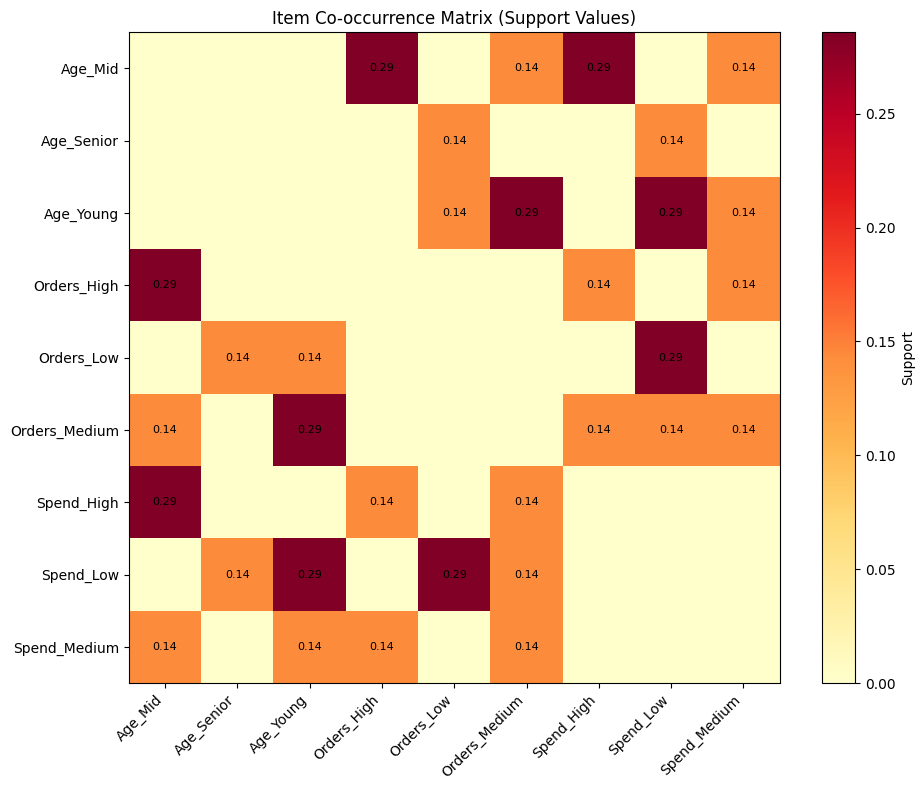


Association Rule Mining Complete!


In [16]:
#5. CALCULATE MULTIPLE RULES
print("\n\n5. CALCULATING MULTIPLE ASSOCIATION RULES")

#Define rules to test
rules_to_test = [
    (['Orders_High'], ['Spend_High']),
    (['Age_Young'], ['Spend_Low']),
    (['Age_Senior'], ['Spend_High']),
    (['Age_Mid'], ['Orders_High']),
    (['Age_Young', 'Orders_High'], ['Spend_High']),
]

print("\nAssociation Rules Analysis:")
print(f"{'Rule':<30} {'Support':<10} {'Confidence':<12} {'Lift':<10} {'Strength':<15}")


for antecedent, consequent in rules_to_test:
    metrics = calculate_association_metrics(df_binary, antecedent, consequent)
    
    # Determine strength
    if metrics['lift'] > 1.5:
        strength = "Strong"
    elif metrics['lift'] > 1.2:
        strength = "Moderate"
    elif metrics['lift'] > 1:
        strength = "Weak"
    elif metrics['lift'] == 1:
        strength = "None"
    else:
        strength = "Negative"
    
    rule_str = f"{antecedent} → {consequent}"
    print(f"{rule_str:<30} {metrics['support_AB']:<10.3f} {metrics['confidence']:<12.3f} "
        f"{metrics['lift']:<10.3f} {strength:<15}")

#6. VISUALIZE ASSOCIATION RULES
print("\n\n6. VISUALIZING ASSOCIATION RULES")


#Create a heatmap of item co-occurrence
cooccurrence_matrix = np.zeros((len(all_items), len(all_items)))

for i, item1 in enumerate(all_items):
    for j, item2 in enumerate(all_items):
        if i != j:
            both_present = (df_binary[item1] == 1) & (df_binary[item2] == 1)
            cooccurrence_matrix[i, j] = both_present.sum() / len(df_binary)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cooccurrence_matrix, cmap='YlOrRd')

#Add labels
ax.set_xticks(np.arange(len(all_items)))
ax.set_yticks(np.arange(len(all_items)))
ax.set_xticklabels(all_items, rotation=45, ha='right')
ax.set_yticklabels(all_items)

#Add text annotations
for i in range(len(all_items)):
    for j in range(len(all_items)):
        if i != j and cooccurrence_matrix[i, j] > 0:
            text = ax.text(j, i, f'{cooccurrence_matrix[i, j]:.2f}',
                        ha="center", va="center", color="black", fontsize=8)

ax.set_title("Item Co-occurrence Matrix (Support Values)")
plt.colorbar(im, label='Support')
plt.tight_layout()
plt.savefig('association_rules_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAssociation Rule Mining Complete!")


## Key Explanations for Part (c):
- Transaction Creation: Convert binned data into transactional format suitable for association rule mining.
- Binary Matrix: Create a binary representation where 1 indicates item presence and 0 indicates absence.

#### Metrics Calculation:
- Support: Proportion of transactions containing the itemset
- Confidence: Conditional probability of consequent given antecedent
- Lift: Ratio of observed support to expected support if items were independent

### Rule Interpretation:
- Lift > 1: Positive association (items occur together more often than expected)
- Lift = 1: No association (items are independent)
- Lift < 1: Negative association (items occur together less often than expected)

### Visualization: Heatmap shows pairwise support values between items.

## (d) Implement linear regression predicting AvgSpend from Age and Orders in Python.

In [18]:
print("PART (d): LINEAR REGRESSION")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


#1. DATA PREPARATION FOR REGRESSION
print("\n1. DATA PREPARATION FOR LINEAR REGRESSION")

#Using  scaled data for better regression performance
X = df_standard[['Age_zscore', 'Orders_zscore']] 
y = df_standard['AvgSpend_zscore']

print("Features (X):")
print(X.head())
print(f"\nShape of X: {X.shape}")

print("\nTarget (y):")
print(y.head())
print(f"\nShape of y: {y.shape}")

PART (d): LINEAR REGRESSION

1. DATA PREPARATION FOR LINEAR REGRESSION
Features (X):
   Age_zscore  Orders_zscore
0   -0.354441       0.359211
1    1.382318      -1.526645
2   -1.594983      -0.269408
3    0.637993       1.616448
4   -1.098766      -0.898027

Shape of X: (7, 2)

Target (y):
0    0.522405
1   -1.638451
2   -0.474913
3    1.436613
4   -0.973572
Name: AvgSpend_zscore, dtype: float64

Shape of y: (7,)


In [21]:
#2. SPLIT DATA INTO TRAINING AND TEST SETS
print("\n\n2. TRAIN-TEST SPLIT")

#80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

#3. TRAIN LINEAR REGRESSION MODEL
print("\n\n3. TRAINING LINEAR REGRESSION MODEL")

model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Coefficients: {model_sklearn.coef_}")
print(f"Intercept: {model_sklearn.intercept_:.4f}")

# 4. MAKE PREDICTIONS
print("\n\n4. MAKING PREDICTIONS")

y_pred_train = model_sklearn.predict(X_train)
y_pred_test = model_sklearn.predict(X_test)

print("Predictions on training set:")
for i, (actual, pred) in enumerate(zip(y_train[:5], y_pred_train[:5])):
    print(f"  Sample {i+1}: Actual = {actual:.3f}, Predicted = {pred:.3f}")

print("\nPredictions on test set:")
for i, (actual, pred) in enumerate(zip(y_test, y_pred_test)):
    print(f"  Sample {i+1}: Actual = {actual:.3f}, Predicted = {pred:.3f}")



2. TRAIN-TEST SPLIT
Training set size: 5 samples
Test set size: 2 samples
Features: 2


3. TRAINING LINEAR REGRESSION MODEL
Model trained successfully!
Coefficients: [0.59301538 0.36740344]
Intercept: 0.2593


4. MAKING PREDICTIONS
Predictions on training set:
  Sample 1: Actual = 0.273, Predicted = 0.706
  Sample 2: Actual = -0.475, Predicted = -0.785
  Sample 3: Actual = -0.974, Predicted = -0.722
  Sample 4: Actual = 1.437, Predicted = 1.232
  Sample 5: Actual = 0.855, Predicted = 0.686

Predictions on test set:
  Sample 1: Actual = 0.522, Predicted = 0.181
  Sample 2: Actual = -1.638, Predicted = 0.518


In [22]:
#5. MODEL EVALUATION
print("\n\n5. MODEL EVALUATION METRICS")


#Calculate metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Training Set Metrics:")
print(f"  Mean Squared Error (MSE): {mse_train:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"  R² Score: {r2_train:.4f} ({r2_train*100:.1f}%)")

print("\nTest Set Metrics:")
print(f"  Mean Squared Error (MSE): {mse_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"  R² Score: {r2_test:.4f} ({r2_test*100:.1f}%)")



5. MODEL EVALUATION METRICS
Training Set Metrics:
  Mean Squared Error (MSE): 0.0836
  Root Mean Squared Error (RMSE): 0.2891
  Mean Absolute Error (MAE): 0.2739
  R² Score: 0.8898 (89.0%)

Test Set Metrics:
  Mean Squared Error (MSE): 2.3838
  Root Mean Squared Error (RMSE): 1.5439
  Mean Absolute Error (MAE): 1.2490
  R² Score: -1.0421 (-104.2%)


## Key Explanations for Part (d):
- Data Splitting: Separate data into training and test sets to evaluate model performance.
- Model Training: Fit a linear regression model to find the relationship between features (Age, Orders) and target (AvgSpend).

### Evaluation Metrics:
- MSE/RMSE: Measures average squared/prediction error
- MAE: Average absolute error
- R²: Proportion of variance explained by the model

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
invalid literal for int() with base 10: ''
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 268, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))
                         ^^^^^^^^^^^^^^^^^^^^^^^


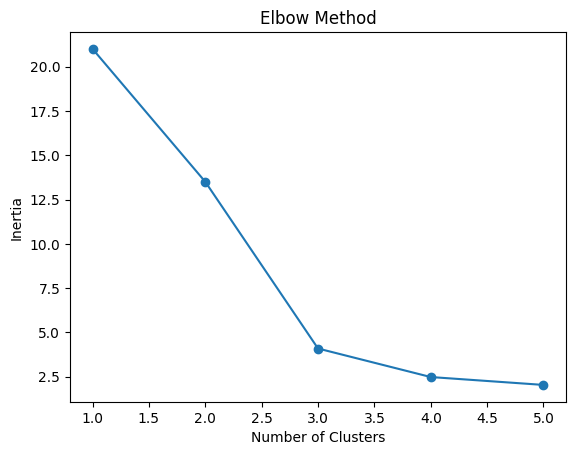

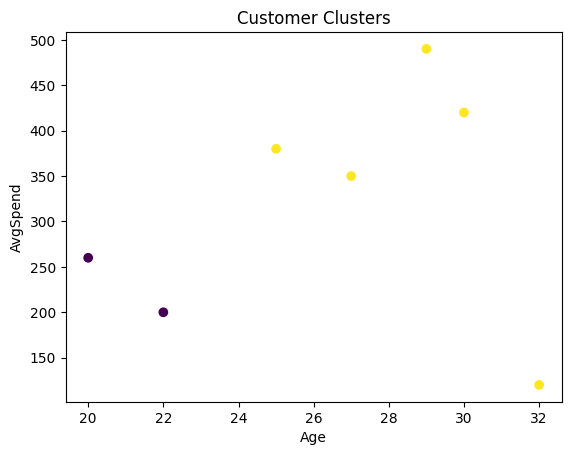

          Age  Orders  AvgSpend  Count
Cluster                               
0        21.0     3.5     230.0      2
1        28.6     4.8     352.0      5


In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Orders', 'AvgSpend']])

# 2. Determine Optimal K using Elbow Method
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 3. Apply K-Means (assuming K=2 from elbow)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. Visualize (2D projection)
plt.scatter(df['Age'], df['AvgSpend'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('AvgSpend')
plt.title('Customer Clusters')
plt.show()

# 5. Cluster Interpretation
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Orders': 'mean',
    'AvgSpend': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})
print(cluster_summary)



6. VISUALIZING CUSTOMER CLUSTERS


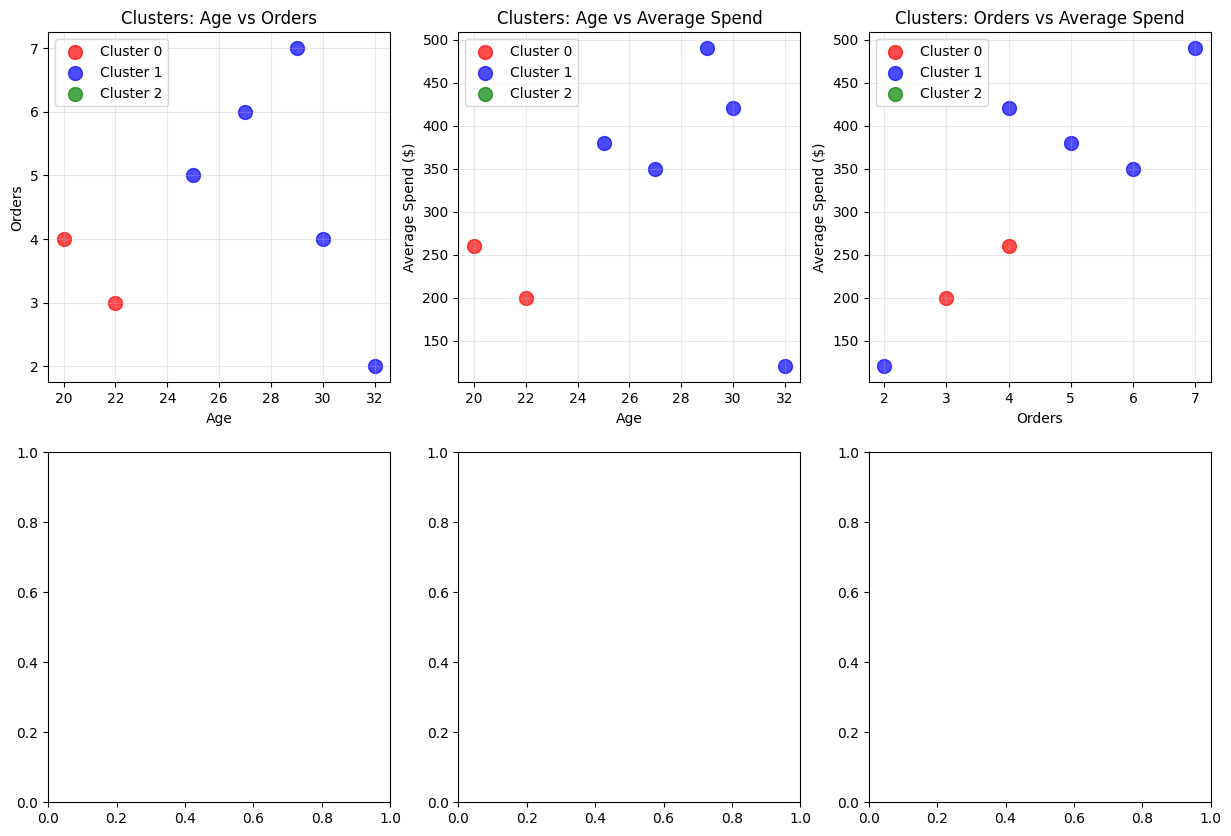

In [25]:
#6. VISUALIZE CLUSTERS
print("\n\n6. VISUALIZING CUSTOMER CLUSTERS")

optimal_k = 3 
df_clustered = df.copy()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#color map for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Plot 1: Age vs Orders
for cluster_num in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_num]
    axes[0, 0].scatter(cluster_data['Age'], cluster_data['Orders'], 
                    c=colors[cluster_num], s=100, alpha=0.7, 
                    label=f'Cluster {cluster_num}')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Orders')
axes[0, 0].set_title('Clusters: Age vs Orders')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Age vs AvgSpend
for cluster_num in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_num]
    axes[0, 1].scatter(cluster_data['Age'], cluster_data['AvgSpend'], 
                    c=colors[cluster_num], s=100, alpha=0.7, 
                    label=f'Cluster {cluster_num}')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Average Spend ($)')
axes[0, 1].set_title('Clusters: Age vs Average Spend')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Orders vs AvgSpend
for cluster_num in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_num]
    axes[0, 2].scatter(cluster_data['Orders'], cluster_data['AvgSpend'], 
                    c=colors[cluster_num], s=100, alpha=0.7, 
                    label=f'Cluster {cluster_num}')
axes[0, 2].set_xlabel('Orders')
axes[0, 2].set_ylabel('Average Spend ($)')
axes[0, 2].set_title('Clusters: Orders vs Average Spend')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

In [27]:
#7. BUSINESS INTERPRETATION AND RECOMMENDATIONS
print("\n\n7. BUSINESS INTERPRETATION AND RECOMMENDATIONS")

print("\nBased on the clustering analysis, here are actionable insights:")

cluster_profiles = []
for cluster_num in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_num]
    
    profile = {
        'cluster': cluster_num,
        'size': len(cluster_data),
        'avg_age': cluster_data['Age'].mean(),
        'avg_orders': cluster_data['Orders'].mean(),
        'avg_spend': cluster_data['AvgSpend'].mean(),
        'customer_ids': list(cluster_data['CustomerID'])
    }
    cluster_profiles.append(profile)

# Sort clusters by average spending (highest to lowest)
cluster_profiles.sort(key=lambda x: x['avg_spend'], reverse=True)

for i, profile in enumerate(cluster_profiles):
    print(f"\n{i+1}. {['High-Value', 'Mid-Value', 'Low-Value'][i]} Segment (Cluster {profile['cluster']}):")
    print(f"   • Segment Size: {profile['size']} customers ({profile['size']/len(df_clustered)*100:.0f}%)")
    print(f"   • Average Age: {profile['avg_age']:.1f} years")
    print(f"   • Average Order Frequency: {profile['avg_orders']:.1f} orders")
    print(f"   • Average Spending: ${profile['avg_spend']:.0f}")
    print(f"   • Customer IDs: {profile['customer_ids']}")
    
    # Recommendations based on segment
    if i == 0:  # High-value segment
        print(f"   • Recommendations:")
        print(f"     - Offer premium loyalty program")
        print(f"     - Provide exclusive early access to new products")
        print(f"     - Personalize communication with dedicated account manager")
    elif i == 1:  # Mid-value segment
        print(f"   • Recommendations:")
        print(f"     - Encourage higher order frequency with bundle deals")
        print(f"     - Offer cross-selling opportunities")
        print(f"     - Send targeted promotions based on purchase history")
    else:  # Low-value segment
        print(f"   • Recommendations:")
        print(f"     - Re-engagement campaigns with special discounts")
        print(f"     - Educate about product benefits and usage")
        print(f"     - Survey to understand barriers to higher spending")

print("\n\nOverall Strategy:")
print("1. Retain high-value customers with exceptional service")
print("2. Grow mid-value customers through targeted upselling")
print("3. Reactivate low-value customers with re-engagement campaigns")
print("4. Monitor segment migration over time")




7. BUSINESS INTERPRETATION AND RECOMMENDATIONS

Based on the clustering analysis, here are actionable insights:

1. High-Value Segment (Cluster 1):
   • Segment Size: 5 customers (71%)
   • Average Age: 28.6 years
   • Average Order Frequency: 4.8 orders
   • Average Spending: $352
   • Customer IDs: [101, 102, 104, 106, 107]
   • Recommendations:
     - Offer premium loyalty program
     - Provide exclusive early access to new products
     - Personalize communication with dedicated account manager

2. Mid-Value Segment (Cluster 0):
   • Segment Size: 2 customers (29%)
   • Average Age: 21.0 years
   • Average Order Frequency: 3.5 orders
   • Average Spending: $230
   • Customer IDs: [103, 105]
   • Recommendations:
     - Encourage higher order frequency with bundle deals
     - Offer cross-selling opportunities
     - Send targeted promotions based on purchase history

3. Low-Value Segment (Cluster 2):
   • Segment Size: 0 customers (0%)
   • Average Age: nan years
   • Average Or

## Key Explanations for Part (e):
#### Optimal Cluster Determination:
- Elbow Method: Plots inertia (within-cluster sum of squares) against k

#### K-Means Algorithm:
- Partition-based clustering that minimizes within-cluster variance
- Requires specifying number of clusters in advance
- Sensitive to initialization (use n_init parameter)

#### Cluster Analysis:
- Profile each cluster based on feature means
- Create customer personas for each segment
- Identify distinguishing characteristics

#### Visualization Techniques:
- 2D scatter plots for pairwise feature visualization
- Parallel coordinates for multi-variate comparison

#### Business Interpretation:
- Translate statistical clusters into business segments
- Provide actionable marketing recommendations
- Develop retention and growth strategies